In [ ]:
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2022-11-29 14:08:12--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.39.144
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.39.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://developer.nvidia.com/downloads/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 [following]
--2022-11-29 14:08:13--  https://developer.nvidia.com/downloads/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Reusing existing connection to developer.nvidia.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?Z68B6lcHpng39uKWQMsgECAg_KeJOI2uC2dWgpBWPqtDZqr1YYFFqhbvn-LfQE3KAsFgcsvg52koFvAdOjx6Bk3Xq

In [ ]:
!pip install pandas
!pip install librosa
!pip install plotly
!pip install matplotlib
!pip install mutagen
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torch.utils.data import Dataset
import pandas as pd
import torchaudio
import torch
import os

In [ ]:
from mutagen.wave import WAVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip -u "/content/drive/My Drive/SHREYA_CAPSTONE/dataset.zip" -d "/content/data"

Archive:  /content/drive/My Drive/SHREYA_CAPSTONE/dataset.zip
   creating: /content/data/dataset/fold1/
  inflating: /content/data/dataset/fold1/D1.wav  
  inflating: /content/data/dataset/fold1/D10.wav  
  inflating: /content/data/dataset/fold1/D100.wav  
  inflating: /content/data/dataset/fold1/D101.wav  
  inflating: /content/data/dataset/fold1/D102.wav  
  inflating: /content/data/dataset/fold1/D103.wav  
  inflating: /content/data/dataset/fold1/D104.wav  
  inflating: /content/data/dataset/fold1/D105.wav  
  inflating: /content/data/dataset/fold1/D106.wav  
  inflating: /content/data/dataset/fold1/D107.wav  
  inflating: /content/data/dataset/fold1/D108.wav  
  inflating: /content/data/dataset/fold1/D109.wav  
  inflating: /content/data/dataset/fold1/D11.wav  
  inflating: /content/data/dataset/fold1/D110.wav  
  inflating: /content/data/dataset/fold1/D111.wav  
  inflating: /content/data/dataset/fold1/D112.wav  
  inflating: /content/data/dataset/fold1/D113.wav  
  inflating: /co

In [ ]:
import os

In [ ]:
import os
import time
import librosa
import zipfile
import mutagen
import mutagen.wave
import numpy as np
import pandas as pd
import librosa.display
import IPython.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image

In [ ]:
import mutagen

In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/metadata.csv')
metadata.head(700)

filename  class_id  class  fold
0      D1.wav         0  drunk     1
1      D2.wav         0  drunk     1
2      D3.wav         0  drunk     1
3      D4.wav         0  drunk     1
4      D5.wav         0  drunk     1
..        ...       ...    ...   ...
695   S96.wav         1  sober     2
696   S97.wav         1  sober     2
697   S98.wav         1  sober     2
698   S99.wav         1  sober     2
699  S100.wav         1  sober     2

[700 rows x 4 columns]

In [ ]:
def create_dataset_df(csv_file):
    dataset_df = pd.read_csv(csv_file)
    filepaths = []
    for i, row in dataset_df.iterrows():
        filepaths.append(os.path.join('/content/data/dataset', 'fold'+str(row['fold']), row['filename']))
    dataset_df['filepath'] = filepaths
    return dataset_df

In [ ]:
dataset_df = create_dataset_df('/content/metadata.csv')
dataset_df.head()

filename  class_id  class  fold                            filepath
0   D1.wav         0  drunk     1  /content/data/dataset/fold1/D1.wav
1   D2.wav         0  drunk     1  /content/data/dataset/fold1/D2.wav
2   D3.wav         0  drunk     1  /content/data/dataset/fold1/D3.wav
3   D4.wav         0  drunk     1  /content/data/dataset/fold1/D4.wav
4   D5.wav         0  drunk     1  /content/data/dataset/fold1/D5.wav

In [ ]:
dataset_df.groupby('class').filename.count()

class
drunk    600
sober    600
Name: filename, dtype: int64

In [ ]:
def get_audio_metadata_mutagen(filepath):
    metadata = {}
    f = mutagen.wave.WAVE(filepath)
    metadata['length'] = f.info.length
    metadata['bitrate'] = f.info.bitrate
    metadata['channels'] = f.info.channels
    metadata['sample_rate'] = f.info.sample_rate
    metadata['bits_per_sample'] = f.info.bits_per_sample
    return metadata


def compute_audio_statistics(dataset_df):
    metadata_dict = {'length': [], 'bitrate': [], 'channels': [], 'sample_rate': [], 'bits_per_sample': []}
    # Extract metadata
    for filepath in dataset_df['filepath']:
        metadata = get_audio_metadata_mutagen(filepath)
        for key in metadata_dict.keys():
            metadata_dict[key].append(metadata[key])
    # Add new columns to dataframe
    for key in metadata_dict.keys():
        dataset_df[key] = metadata_dict[key]

    return dataset_df

In [ ]:
audio_statistics_df = compute_audio_statistics(dataset_df)

In [ ]:
audio_statistics_df.describe()

class_id         fold       length       bitrate     channels  \
count  1200.000000  1200.000000  1200.000000  1.200000e+03  1200.000000   
mean      0.500000     1.500000     6.750759  7.952600e+05     1.045000   
std       0.500208     0.500208     8.875497  1.746935e+05     0.207391   
min       0.000000     1.000000     0.360000  2.560000e+05     1.000000   
25%       0.000000     1.000000     3.470125  7.680000e+05     1.000000   
50%       0.500000     1.500000     3.870542  7.680000e+05     1.000000   
75%       1.000000     2.000000     7.497833  7.680000e+05     1.000000   
max       1.000000     2.000000   142.950400  1.536000e+06     2.000000   

        sample_rate  bits_per_sample  
count   1200.000000           1200.0  
mean   47560.000000             16.0  
std     4592.109852              0.0  
min    16000.000000             16.0  
25%    48000.000000             16.0  
50%    48000.000000             16.0  
75%    48000.000000             16.0  
max    50000.000000             16.0

In [ ]:
audio_statistics_df['sample_rate'].value_counts(), audio_statistics_df['bits_per_sample'].value_counts()

(48000    997
 50000    159
 16000     24
 44100     20
 Name: sample_rate, dtype: int64, 16    1200
 Name: bits_per_sample, dtype: int64)

In [ ]:
audio_statistics_df['sample_rate'].mean()

47560.0

In [ ]:
audio_statistics_df.groupby('class').describe()

class_id                                      fold       ...  \
         count mean  std  min  25%  50%  75%  max  count mean  ...   
class                                                          ...   
drunk    600.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  600.0  1.0  ...   
sober    600.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  600.0  2.0  ...   

      sample_rate          bits_per_sample                                     \
              75%      max           count  mean  std   min   25%   50%   75%   
class                                                                           
drunk     50000.0  50000.0           600.0  16.0  0.0  16.0  16.0  16.0  16.0   
sober     48000.0  48000.0           600.0  16.0  0.0  16.0  16.0  16.0  16.0   

             
        max  
class        
drunk  16.0  
sober  16.0  

[2 rows x 56 columns]

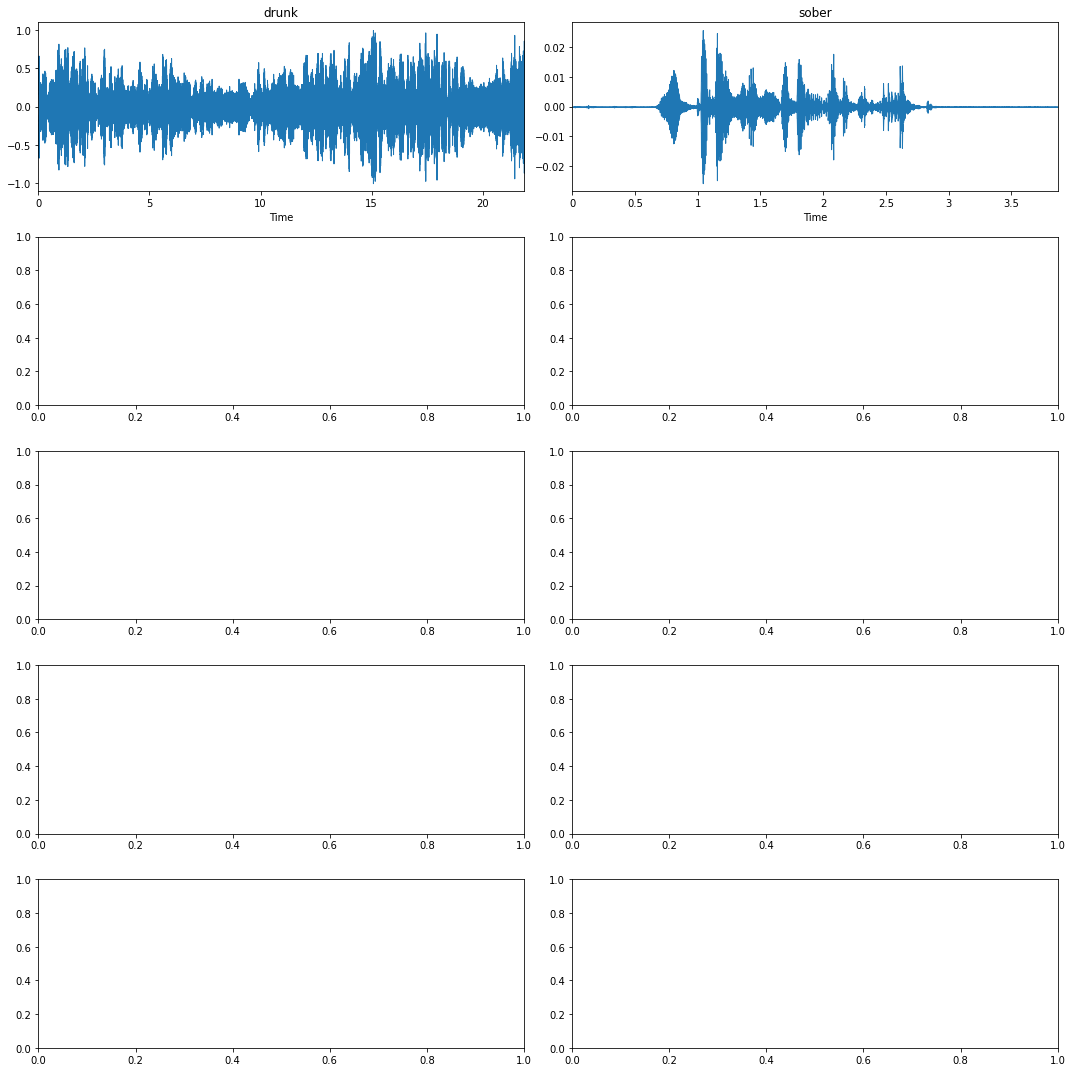

In [ ]:
# Randomly select one sample of each class
random_samples = dataset_df.groupby('class').sample(1)
audio_samples, labels = random_samples['filepath'].tolist(), random_samples['class'].tolist()

# Visualize the waveforms
fig, axs = plt.subplots(5, 2, figsize=(15,15))
index = 0
for col in range(2):
    for row in range(1):
        audio_file, sample_rate = librosa.load(audio_samples[index])
        librosa.display.waveplot(audio_file, sample_rate, ax=axs[row][col])
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()

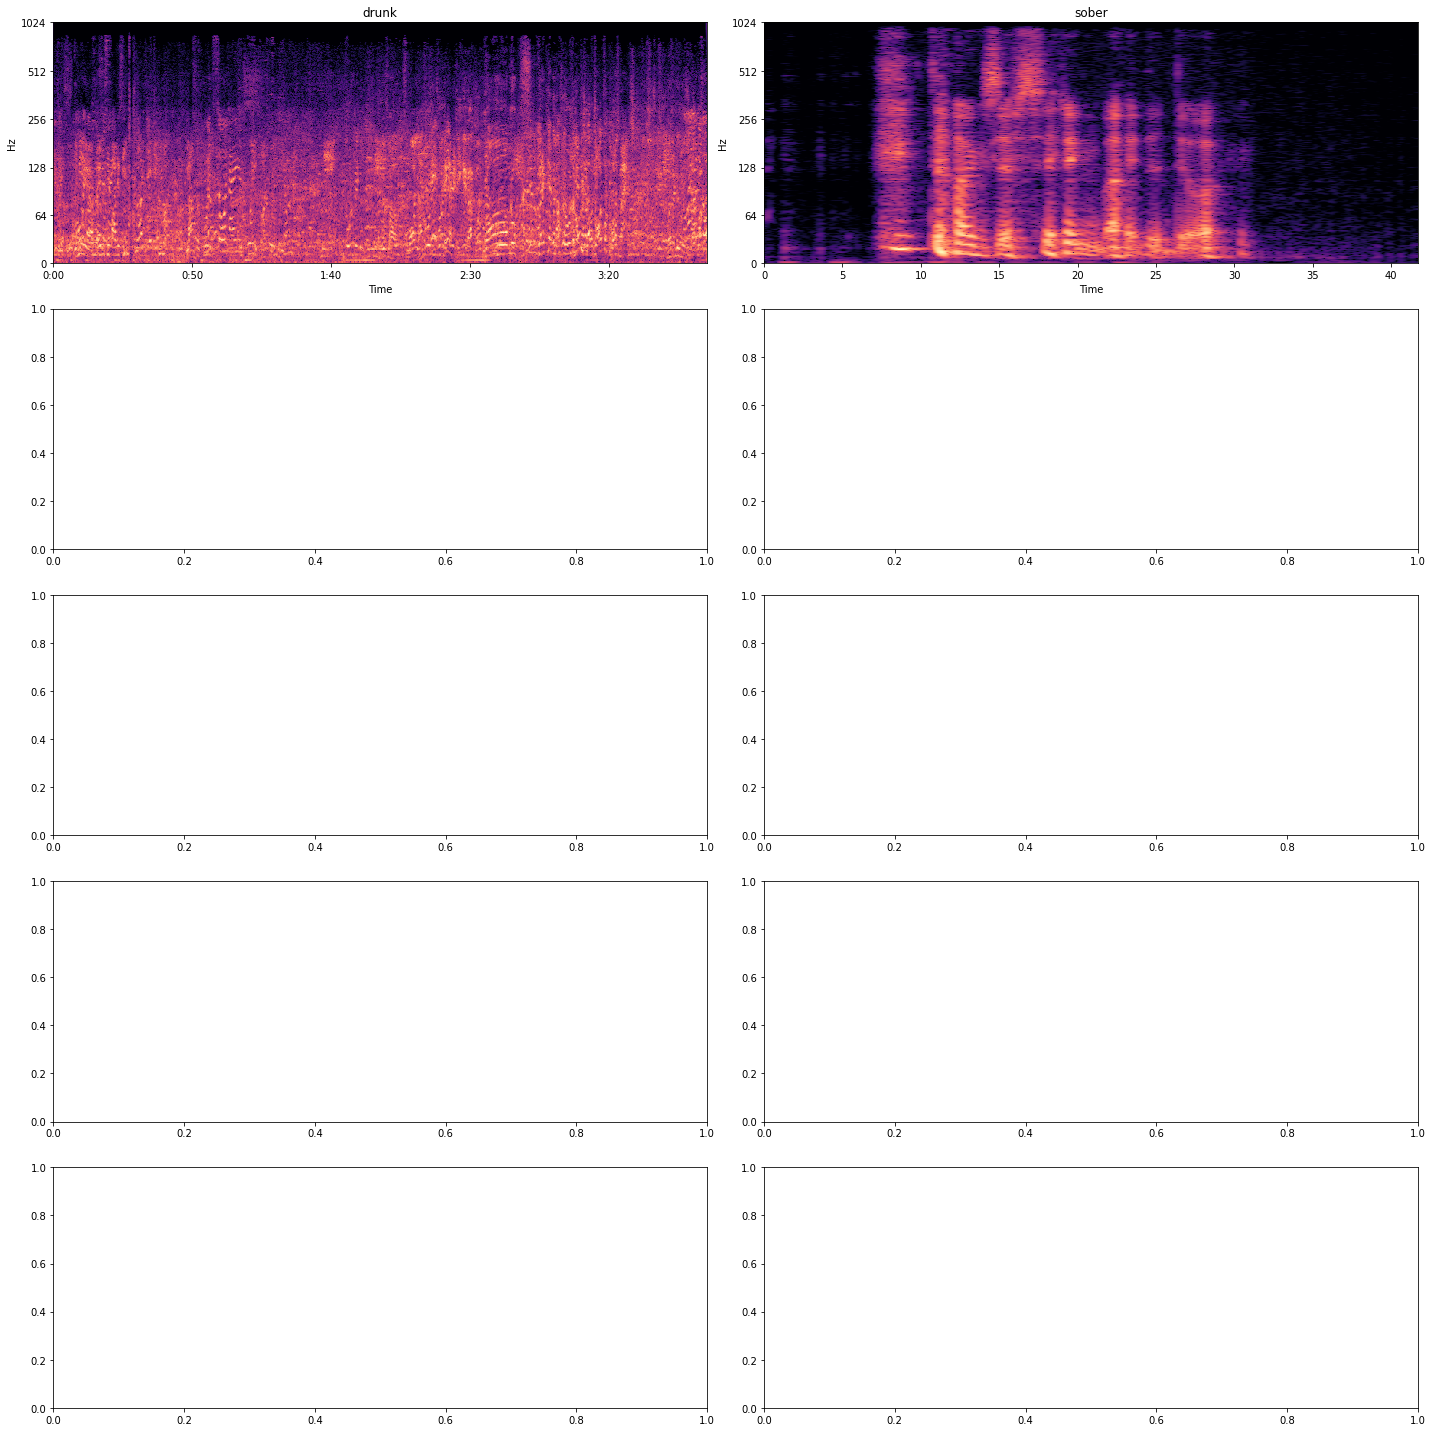

In [ ]:
n_fft = 2048
# Librosa default is n_fft // 4
hop_length = 100
fig, axs = plt.subplots(5, 2, figsize=(20,20))
index = 0
n_s = 4
for col in range(2):
    for row in range(1):
        audio_file, sample_rate = librosa.load(audio_samples[index])
        stft = librosa.stft(audio_file, n_fft, hop_length)  # STFT of y
        S_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
        librosa.display.specshow(S_db,
                             sr=n_fft,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis='log',
                             ax=axs[row][col])
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()

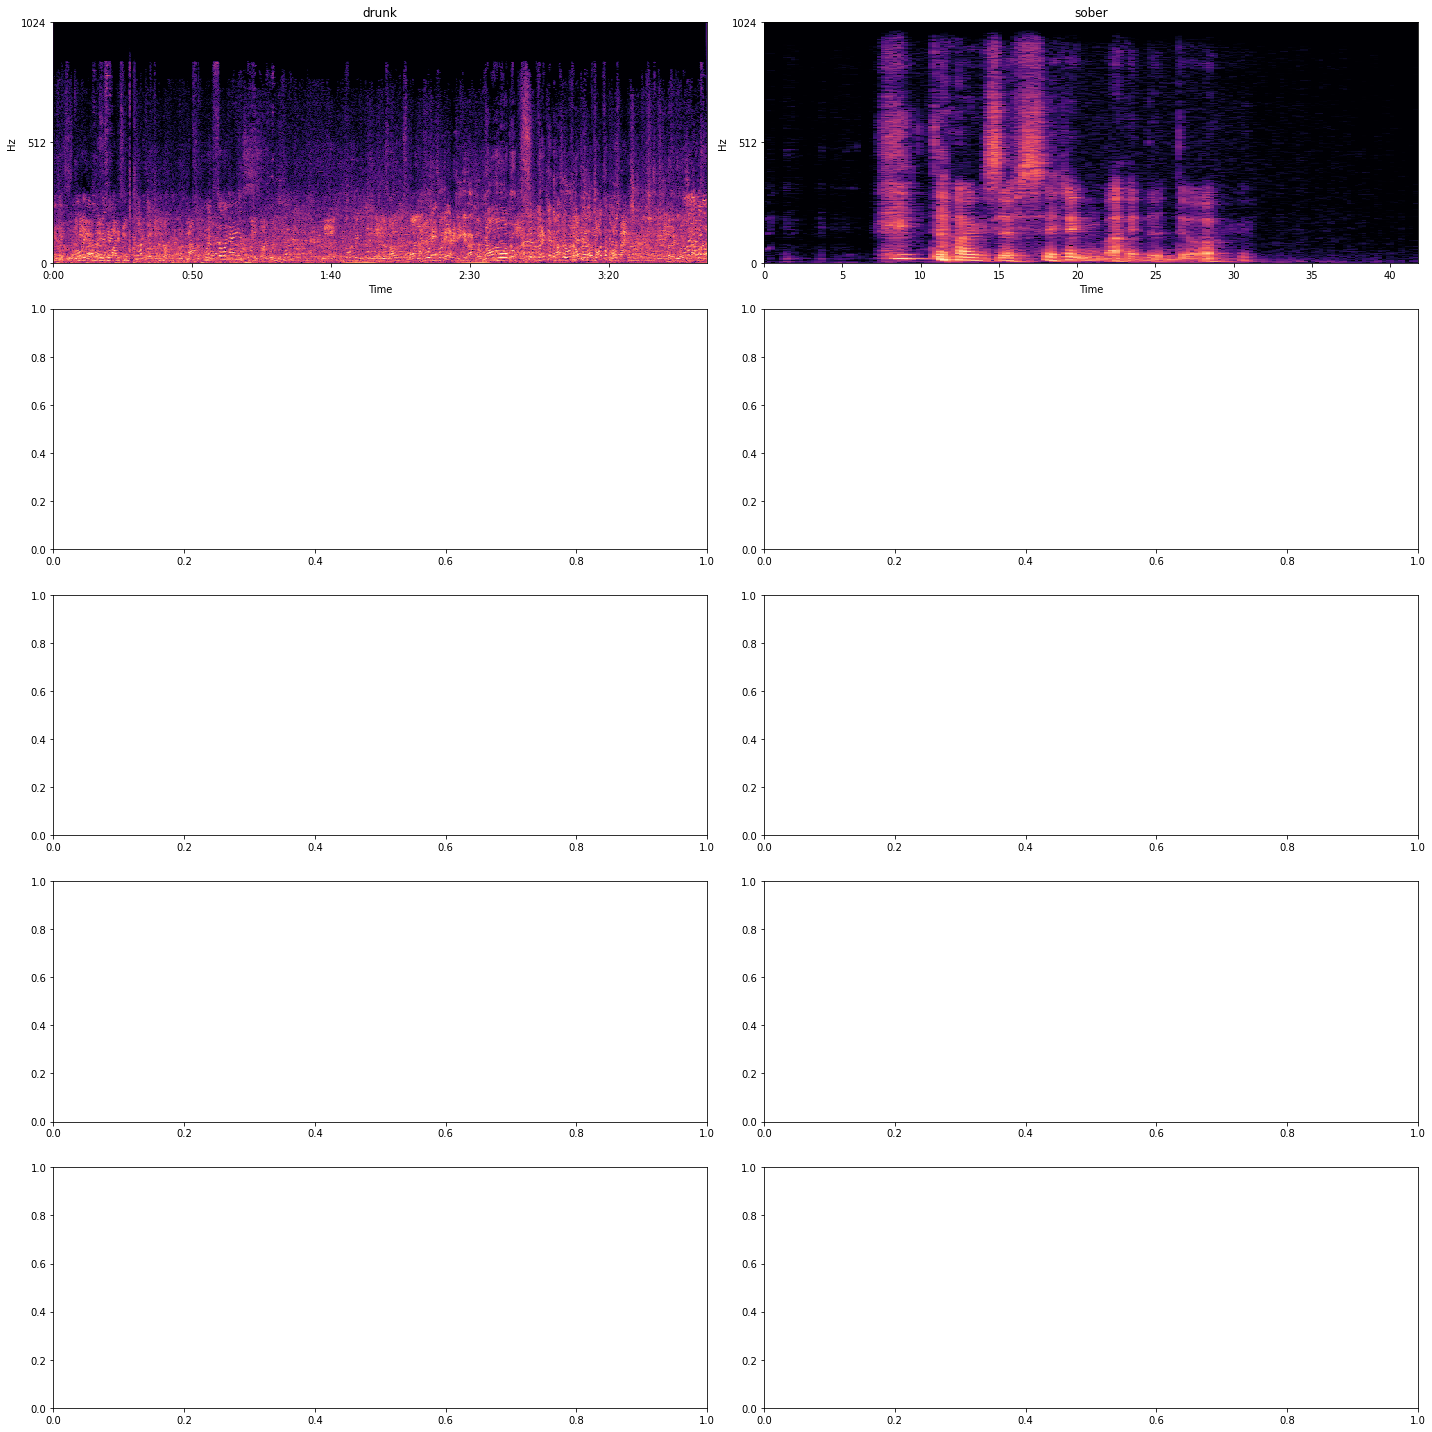

In [ ]:
n_fft = 2048
# Librosa default is n_fft // 4
hop_length = 512
fig, axs = plt.subplots(5, 2, figsize=(20,20))
index = 0
n_s = 4
for col in range(2):
    for row in range(1):
        audio_file, sample_rate = librosa.load(audio_samples[index])
        stft = librosa.stft(audio_file, n_fft, hop_length)  # STFT of y
        S_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
        librosa.display.specshow(S_db,
                             sr=n_fft,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis='mel',
                             ax=axs[row][col])
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()

In [ ]:
index = 0 #drunk
print('Listen to {} sample'.format(labels[index]))
IPython.display.Audio(audio_samples[index])

Listen to drunk sample


In [ ]:
index = 1 #sober
print('Listen to {} sample'.format(labels[index]))
IPython.display.Audio(audio_samples[index])

Listen to sober sample


In [ ]:
audio_file, sample_rate = librosa.load(audio_samples[0])
stft = librosa.stft(audio_file)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
print(S_db.shape)
S_db

(1025, 942)


array([[-29.349398, -36.13102 , -36.130146, ..., -44.57888 , -41.23612 ,
        -34.64114 ],
       [-35.635254, -31.723167, -30.819921, ..., -37.453953, -51.000168,
        -35.743843],
       [-49.74896 , -34.544006, -29.638298, ..., -39.564674, -40.18342 ,
        -33.015198],
       ...,
       [-58.943058, -64.96384 , -80.      , ..., -80.      , -74.45725 ,
        -60.92799 ],
       [-58.943836, -64.96453 , -80.      , ..., -80.      , -74.45565 ,
        -60.928757],
       [-58.94409 , -64.96485 , -80.      , ..., -80.      , -74.460464,
        -60.92933 ]], dtype=float32)

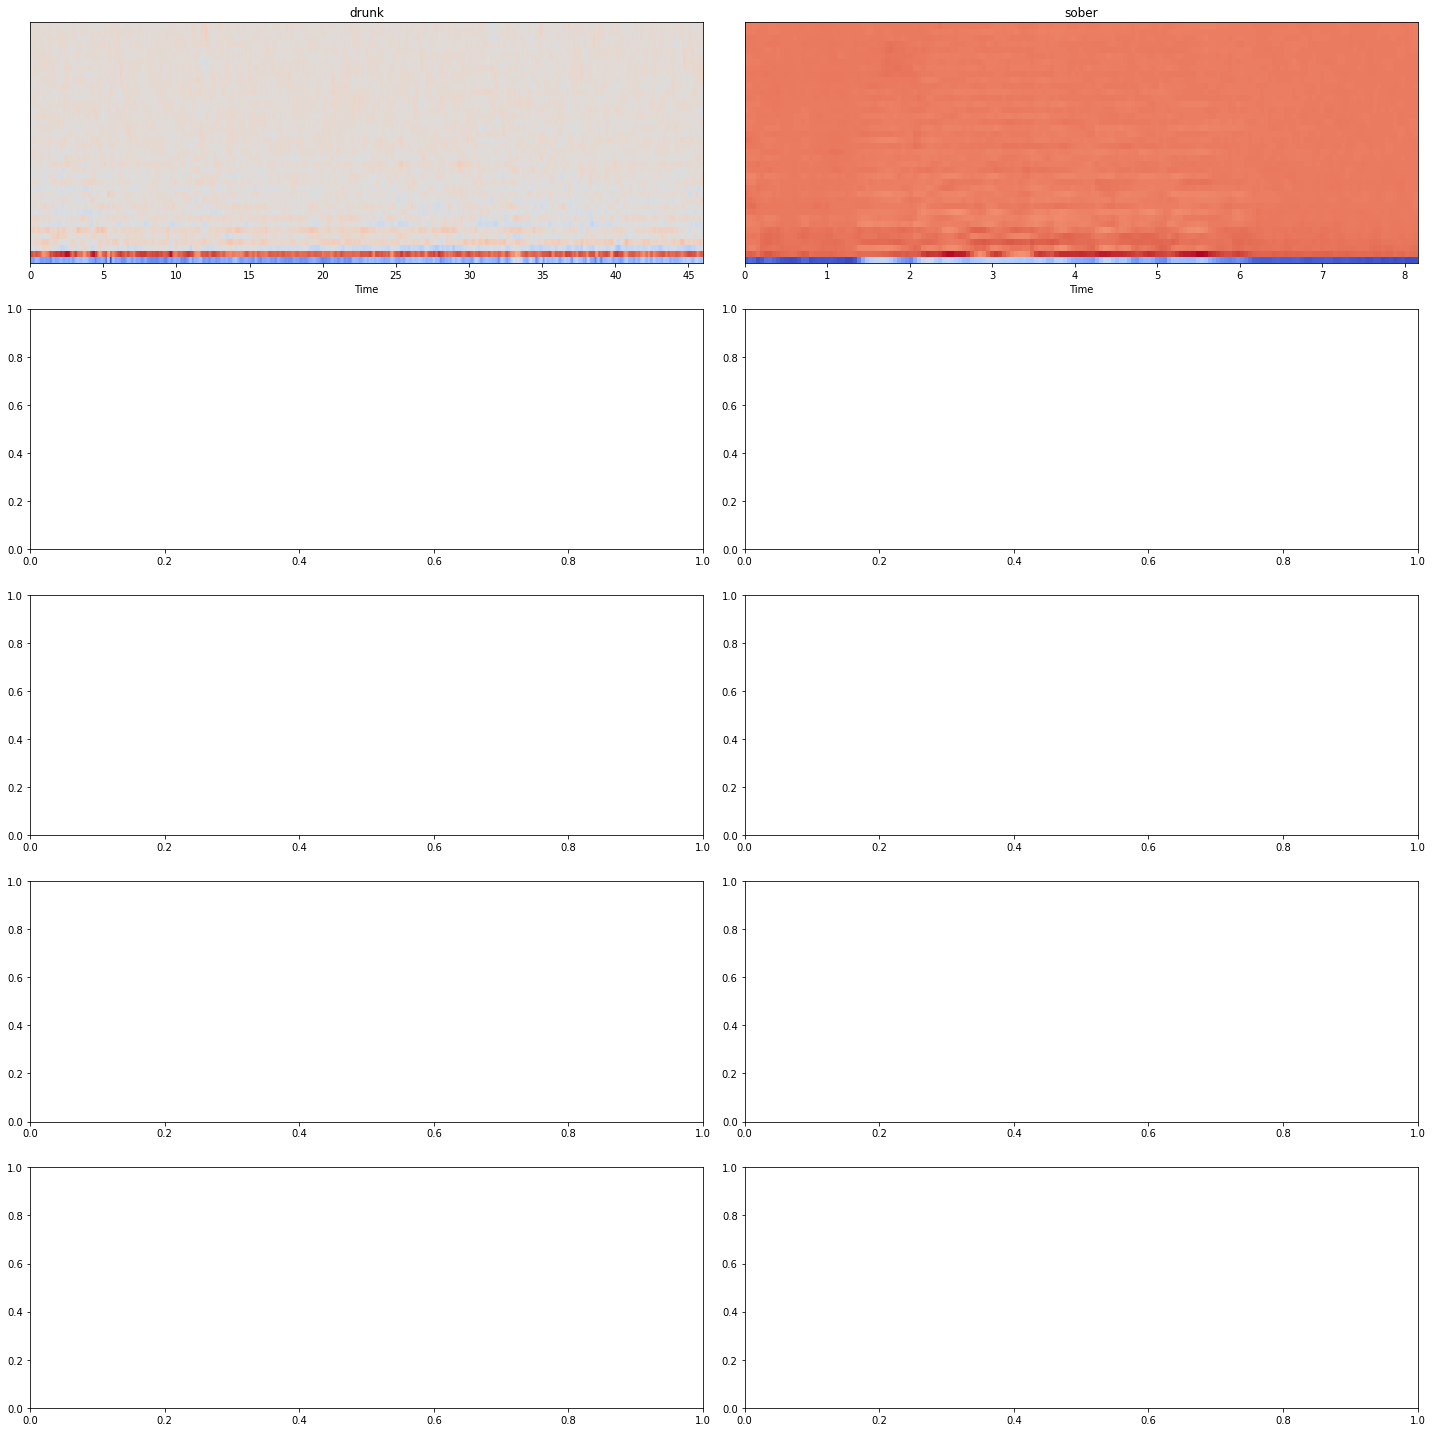

In [ ]:
# Visualize 40 MFCCs
n_fft = 2048
# Librosa default is n_fft // 4
hop_length = 100
fig, axs = plt.subplots(5, 2, figsize=(20,20))
index = 0
n_s = 4
for col in range(2):
    for row in range(1):
        audio_file, sample_rate = librosa.load(audio_samples[index])
        mfccs = librosa.feature.mfcc(audio_file,
                                    sr=sample_rate,
                                    n_fft=n_fft,
                                    n_mfcc=40)
        librosa.display.specshow(mfccs,
                             sr=n_fft,
                             hop_length=hop_length,
                             x_axis="time",
                             ax=axs[row][col])
        axs[row][col].set_title('{}'.format(labels[index]))
        index += 1
fig.tight_layout()

In [ ]:
dataset_df.head()

filename  class_id  class  fold                            filepath  \
0   D1.wav         0  drunk     1  /content/data/dataset/fold1/D1.wav   
1   D2.wav         0  drunk     1  /content/data/dataset/fold1/D2.wav   
2   D3.wav         0  drunk     1  /content/data/dataset/fold1/D3.wav   
3   D4.wav         0  drunk     1  /content/data/dataset/fold1/D4.wav   
4   D5.wav         0  drunk     1  /content/data/dataset/fold1/D5.wav   

     length  bitrate  channels  sample_rate  bits_per_sample  
0  9.798821  1411200         2        44100               16  
1  7.437833  1536000         2        48000               16  
2  7.857833  1536000         2        48000               16  
3  6.501587  1411200         2        44100               16  
4  7.717833  1536000         2        48000               16

In [ ]:
class classification(Dataset):

    def __init__(self, annotation_files, audio_dir, transformation,target_sample_rate, num_samples, device):
      pass

    def __len__(self):
      pass

    def __getitem__(self, item):
      pass

    def _cut_if_necessary(self, signal):
      pass

    def _right_pad_if_necessary(self, signal):
      pass

    def _mix_down_if_necessary(self, signal):
      pass

    def _get_audio_sample_path(self, item):
      pass

    def _get_audio_sample_label(self, item):
      pass

In [ ]:
class classification(Dataset):

    def __init__(self, annotation_files, audio_dir, transformation,
                 target_sample_rate, num_samples, device):
        self.annotations = pd.read_csv(annotation_files)
        self.audio_dir = audio_dir
        self.device = device
        self.transformation = transformation.to(self.device)
        self.target_sample_rate = target_sample_rate
        self.num_samples = num_samples

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, item):
        audio_sample_path = self._get_audio_sample_path(item)
        label = self._get_audio_sample_label(item)
        signal, sr = torchaudio.load(audio_sample_path)
        signal = signal.to(self.device)
        signal = self._mix_down_if_necessary(signal)
        signal = self._cut_if_necessary(signal)
        signal = self._right_pad_if_necessary(signal)
        signal = self.transformation(signal)
        return signal, label

    def _cut_if_necessary(self, signal):
        # signal -> (1, num_sample)
        if signal.shape[1] > self.num_samples:
            signal = signal[:, :self.num_samples]
        return signal

    def _right_pad_if_necessary(self, signal):
        len_signal = signal.shape[1]
        if len_signal < self.num_samples: # apply right pad
            num_missing_samples = self.num_samples - len_signal
            last_dim_padding = (0, num_missing_samples)
            signal = torch.nn.functional.pad(signal, last_dim_padding)
        return signal

    def _mix_down_if_necessary(self, signal):
        # signal = (channels, num_samples) -> (2, 16000) -> (1, 16000)
        if signal.shape[0] > 1:
            signal = torch.mean(signal, dim=0, keepdim=True)
        return signal

    def _get_audio_sample_path(self, item):
        fold = f"fold{self.annotations.iloc[item, 3]}"
        path = os.path.join(self.audio_dir, fold, self.annotations.iloc[item, 0])
        return path

    def _get_audio_sample_label(self, item):
        return self.annotations.iloc[item, 1]

if __name__ == "__main__":
    ANNOTATIONS_FILE = '/content/metadata.csv'
    AUDIO_DIR = '/content/data/dataset'
    SAMPLE_RATE = 47560
    NUM_SAMPLES = 47560

    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
    print(f"Using device {device}")

    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_fft=1024,
        hop_length=512,
        n_mels=64
    )

    usd = classification(ANNOTATIONS_FILE, AUDIO_DIR, mel_spectrogram,
                            SAMPLE_RATE, NUM_SAMPLES, device)

    print(f"There are {len(usd)} samples in dataset")
    signal, label = usd[1]
    # a = 1 # dummy

Using device cuda
There are 1200 samples in dataset


In [ ]:
from torch import nn
from torchsummary import summary


class CNNNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # 4 CNN block / flatten / linear / softmax
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=32,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32,
                out_channels=64,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=3,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(in_features=128*5*4, out_features=2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_data):
        x = self.conv1(input_data)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.flatten(x)
        logits = self.linear(x)
        predictions = self.softmax(logits)
        return predictions


if __name__=="__main__":
    cnn = CNNNetwork()
    summary(cnn.cuda(), (1, 64, 44))
    # (1, 64, 44) is the shape of the signal which we obtain in dataset.py

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 66, 46]             160
              ReLU-2           [-1, 16, 66, 46]               0
         MaxPool2d-3           [-1, 16, 33, 23]               0
            Conv2d-4           [-1, 32, 35, 25]           4,640
              ReLU-5           [-1, 32, 35, 25]               0
         MaxPool2d-6           [-1, 32, 17, 12]               0
            Conv2d-7           [-1, 64, 19, 14]          18,496
              ReLU-8           [-1, 64, 19, 14]               0
         MaxPool2d-9             [-1, 64, 9, 7]               0
           Conv2d-10           [-1, 128, 11, 9]          73,856
             ReLU-11           [-1, 128, 11, 9]               0
        MaxPool2d-12            [-1, 128, 5, 4]               0
          Flatten-13                 [-1, 2560]               0
           Linear-14                   

In [ ]:
print(cnn)

CNNNetwork(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=2560, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


In [ ]:
import torch
from torch import nn
import torchaudio
from torch.utils.data import DataLoader
#from modelcnn import CNNNetwork

BATCH_SIZE = 128
EPOCHS = 10
LEARNING_RATE = 0.001

ANNOTATIONS_FILE = '/content/metadata.csv'
AUDIO_DIR = '/content/data/dataset'
SAMPLE_RATE = 22050
NUM_SAMPLES = 22050


def create_data_loader(train_data, batch_size):
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    return train_dataloader


def train_single_epoch(model, data_loader, loss_fn, optimizer, device):
    for input , target in data_loader:
        input, target = input.to(device), target.to(device)

        # loss
        predcition = model(input)
        loss = loss_fn(predcition, target)

        # backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Loss: {loss.item()}")


def train(model, data_loader, loss_fn, optimizer, epochs, device):
    for i in range(epochs):
        print(f"Epoch {i+1}")
        train_single_epoch(model, data_loader, loss_fn, optimizer, device)
        print("-----------------------------------------------")
    print("Training completed!!")


if __name__ == "__main__":

    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
    print(f"Using device {device}")

    # instantiate dataset
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_fft=1024,
        hop_length=512,
        n_mels=64
    )

    usd = classification(ANNOTATIONS_FILE, AUDIO_DIR, mel_spectrogram,
                            SAMPLE_RATE, NUM_SAMPLES, device)

    train_dataloader = create_data_loader(usd, BATCH_SIZE)

    cnn =  CNNNetwork().to(device)
    print(cnn)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(cnn.parameters(), lr=LEARNING_RATE)

    # train
    train(cnn, train_dataloader,loss_fn, optimizer, EPOCHS,device)

    # save model
    path = "state_dict_model.pt"
    torch.save(cnn.state_dict(), path)
    print("Trained model saved at state_dict_model.pt")


Using device cuda
CNNNetwork(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=2560, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)
Epoch 1
Loss: 2.27770

In [ ]:
import torch
import torchaudio

class_mapping = [
    "drunk",
    "sober"
]

def predict(model, input, target, class_mapping):
    model.eval()
    with torch.no_grad():
        predictions = model(input)
        # Tensor (1, 10) -> [ [0.1, 0.01, ..., 0.6] ]
        predicted_index = predictions[0].argmax(0)
        predicted = class_mapping[predicted_index]
        expected = class_mapping[target]
    return predicted, expected


if __name__ == "__main__":
    # load back the model
    cnn = CNNNetwork()
    state_dict = torch.load("state_dict_model.pt")
    cnn.load_state_dict(state_dict)

    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
        sample_rate=SAMPLE_RATE,
        n_fft=1024,
        hop_length=512,
        n_mels=64
    )

    usd = classification(ANNOTATIONS_FILE, AUDIO_DIR, mel_spectrogram,
                            SAMPLE_RATE, NUM_SAMPLES, "cpu")



In [ ]:
print(usd[0][1])

0


In [ ]:
pred = []
exp = []
d = { "drunk":0,"sober":1}

for i in range(len(usd)):
  input, target = usd[i][0], usd[i][1] # [num_cha, fr, t]
  input.unsqueeze_(0)

  # make an inference
  predicted, expected = predict(cnn, input, target,class_mapping)
  print(f"Predicted: '{predicted}', expected: '{expected}'")
  pred.append(d[predicted])
  exp.append(d[expected])

Predicted: 'drunk', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'drunk', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'drunk', expected: 'sober'
Predicted: 'drunk', expected: 'sober'
Predicted: 'drunk', expected: 'sober'
Predicted: 'drunk', expected: 'sober'
Predicted: 'drunk', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: 'sober', expected: 'sober'
Predicted: '

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score


print("accuracy score :",accuracy_score(pred,exp))

print("precision score :", precision_score(pred,exp))

print("recall score :", recall_score(pred,exp))

print("f1 score :",f1_score(pred,exp))


accuracy score : 0.9616666666666667
precision score : 0.9483333333333334
recall score : 0.9743150684931506
f1 score : 0.9611486486486487
